In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
co2_data = pd.read_csv('CO2 dataset.xlsx - Sheet1.csv',index_col=0,squeeze=False,parse_dates=False)
co2_data

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542
...,...
2010,15.60000
2011,15.60000
2012,14.80000


In [ ]:
co2_data.isna().sum()

CO2    0
dtype: int64

In [ ]:
co2_data.dtypes

CO2    float64
dtype: object

<AxesSubplot:xlabel='Year'>

<Figure size 864x432 with 0 Axes>

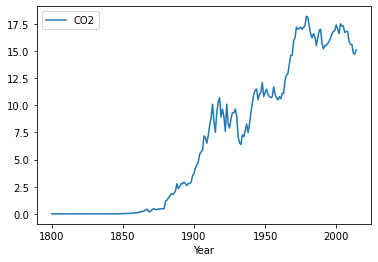

In [ ]:
plt.figure(figsize=(12,6))
co2_data.plot()

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

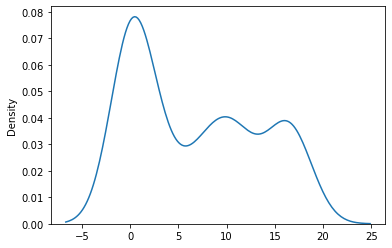

In [ ]:
sns.distplot(co2_data,hist=False)

In [ ]:
from pandas.plotting import lag_plot

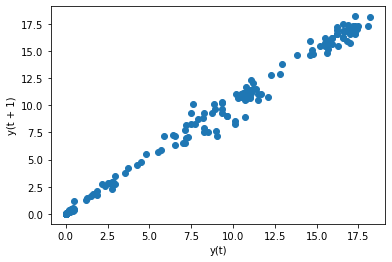

In [ ]:
lag_plot(series = co2_data,lag=1)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

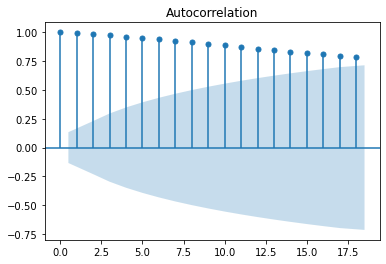

In [ ]:
plot_acf(x = co2_data,lags=18)
plt.show()

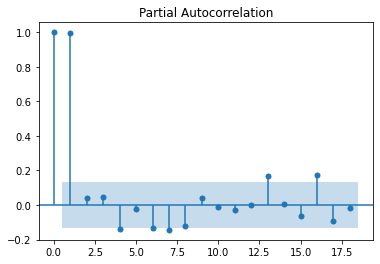

In [ ]:
plot_pacf(x = co2_data,lags=18)
plt.show()

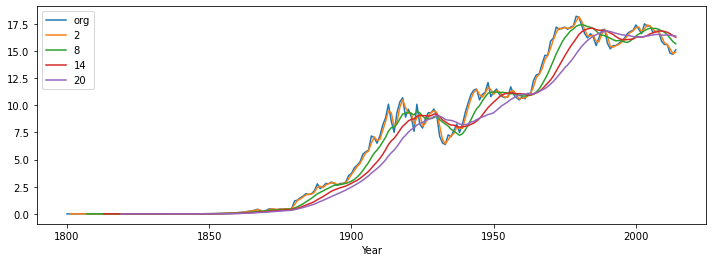

In [ ]:
plt.figure(figsize=(12,4))
co2_data.CO2.plot(label="org")
for i in range(2,24,6):
   co2_data["CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

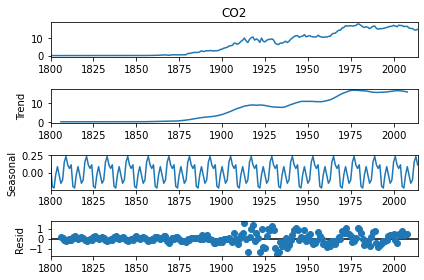

In [ ]:
decompose_ts_add = seasonal_decompose(co2_data.CO2,period=12)
decompose_ts_add.plot()
plt.show()

## model building

In [ ]:
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
CO2_log = np.log(co2_data.CO2)

In [ ]:
co2_data['co2_log'] = CO2_log

In [ ]:
co2_data

,CO2,co2_log
Year,,
1800,0.00568,-5.170804
1801,0.00561,-5.183205
1802,0.00555,-5.193957
1803,0.00548,-5.206650
1804,0.00542,-5.217659
...,...,...
2010,15.60000,2.747271
2011,15.60000,2.747271
2012,14.80000,2.694627


In [ ]:
t=np.arange(1,216,dtype='int')
print(t)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]


In [ ]:
co2_data['t'] = t

In [ ]:
co2_data

,CO2,co2_log,t
Year,,,
1800,0.00568,-5.170804,1
1801,0.00561,-5.183205,2
1802,0.00555,-5.193957,3
1803,0.00548,-5.206650,4
1804,0.00542,-5.217659,5
...,...,...,...
2010,15.60000,2.747271,211
2011,15.60000,2.747271,212
2012,14.80000,2.694627,213


In [ ]:
t_sqr = t*2

In [ ]:
co2_data['t_sqr'] = t_sqr

In [ ]:
co2_data

,CO2,co2_log,t,t_sqr
Year,,,,
1800,0.00568,-5.170804,1,2
1801,0.00561,-5.183205,2,4
1802,0.00555,-5.193957,3,6
1803,0.00548,-5.206650,4,8
1804,0.00542,-5.217659,5,10
...,...,...,...,...
2010,15.60000,2.747271,211,422
2011,15.60000,2.747271,212,424
2012,14.80000,2.694627,213,426


In [ ]:
train_data = co2_data.head(200)
test_data = co2_data.tail(15)

In [ ]:
## Training model
linear_model = smf.ols('CO2~t',data=train_data).fit()
## Testing model
Pred_linear  = pd.Series(linear_model.predict(test_data['t']))
## Evalutaion

rmse_linear = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(Pred_linear))**2))
rmse_linear

1.4378779595679576

In [ ]:
## Exponential model

## Training model
Exp_model = smf.ols('co2_log~t',data=train_data).fit()
## Testing model
Pred_Exp  = pd.Series(Exp_model.predict(test_data['t']))
## Evalutaion
rmse_Exp = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(np.exp(Pred_Exp)))**2))
rmse_Exp

203.82470465915628

In [ ]:
### Quadratic model

## Training model
Quad_model = smf.ols('CO2~t+t_sqr',data=train_data).fit()
## Testing model
Pred_Quad  = pd.Series(Quad_model.predict(test_data[['t','t_sqr']]))
## Evalutaion
rmse_Quad = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(Pred_Quad))**2))
rmse_Quad

1.4378779595679627

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
Train = co2_data.head(200)
Test = co2_data.tail(15)

In [ ]:
ses_model = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.CO2) 

C:\Users\Nikhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Nikhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Nikhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


5.24295397714771

In [ ]:
hwe_model_add_add = ExponentialSmoothing(co2_data["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\Nikhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Nikhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
